In [18]:
import os
import pickle
import sys
sys.path.append("../")

import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics

from openbustools import plotting
from openbustools.traveltime import model_utils

In [41]:
importlib.reload(model_utils)

<module 'openbustools.traveltime.model_utils' from '/home/zack/Desktop/open_bus_tools/notebooks/../openbustools/traveltime/model_utils.py'>

In [42]:
all_res = []
for model_res_file in os.listdir("../results/kcm/"):
    res = model_utils.format_model_res(f"../results/kcm/{model_res_file}")
    all_res.append(res)
all_res = pd.concat(all_res)
all_res = all_res.groupby(['model','experiment_name','metric']).mean()[['value']].reset_index()
all_res

,model,experiment_name,metric,value
0,AVGH,diff_city,ex_var,0.550609
1,AVGH,diff_city,label_max,2968.000000
2,AVGH,diff_city,label_mean,581.562118
3,AVGH,diff_city,label_med,540.000000
4,AVGH,diff_city,label_min,21.000000
...,...,...,...,...
1243,TRSF_TUNED,same_city,pred_mean,-3451.627197
1244,TRSF_TUNED,same_city,pred_med,-2221.843311
1245,TRSF_TUNED,same_city,pred_min,-13125.678906
1246,TRSF_TUNED,same_city,r_score,-2.563338


<Axes: xlabel='value', ylabel='model'>

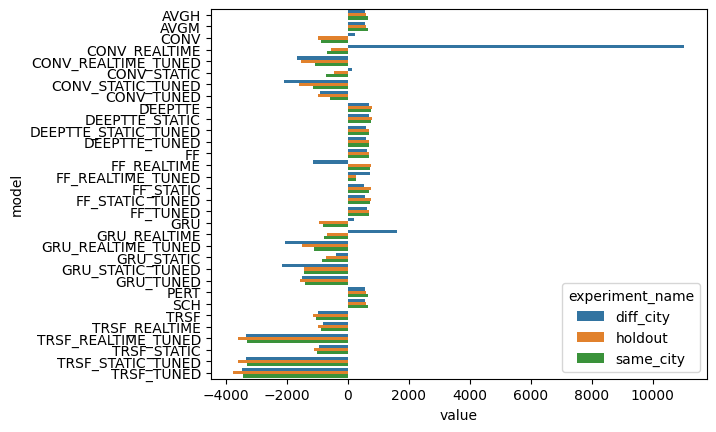

In [49]:
sns.barplot(all_res[all_res['metric']=='label_mean'], x='value', y='model', hue='experiment_name')

In [ ]:
run_folder_kcm = "../results/big_run/kcm/models/"
run_folder_atb = "../results/big_run/atb/models/"
run_folder_mix = "../results/big_run_nosch/kcm_atb/models/"
run_folder_rut = "../results/big_run_nosch/rut/models/"

In [ ]:
# Need to combine model results for all models
model_list = [x for x in os.listdir(run_folder_kcm) if (x[-3:]!="pkl" and x!=".DS_Store")]
all_model_results = []
all_model_times = []
all_model_gen_results = []
for i, m in enumerate(model_list):
    training_results = data_utils.load_pkl(f"{run_folder_kcm}{m}/model_results.pkl")
    results_df, time_df = data_utils.extract_results(training_results, "Seattle")
    if m[-4:]!="GRID":
        gen_results = data_utils.load_pkl(f"{run_folder_kcm}{m}/model_generalization_results.pkl")
        gen_df = data_utils.extract_gen_results(gen_results, "Seattle")
    if i!=0:
        results_df = results_df[results_df['Model']==m]
        time_df = time_df[time_df['Model']==m]
        gen_df = gen_df[gen_df['Model']==m]
    all_model_results.append(results_df)
    all_model_times.append(time_df)
    all_model_gen_results.append(gen_df)
kcm_result_df = pd.concat(all_model_results).sort_values(["Model","Fold"])
kcm_time_df = pd.concat(all_model_times).sort_values(["Model","Fold"])
kcm_gen_df = pd.concat(all_model_gen_results).sort_values(["Model","Fold"])
kcm_baseline_df = kcm_gen_df[kcm_gen_df['Loss']=="Train_Losses"].copy()
kcm_baseline_df['Loss'] = "Network Baseline"
kcm_baseline_df = kcm_baseline_df[['Model','City','Loss','Fold','MAPE','RMSE','MAE']]

# Need to combine model results for all models
model_list = [x for x in os.listdir(run_folder_atb) if (x[-3:]!="pkl" and x!=".DS_Store")]
all_model_results = []
all_model_times = []
all_model_gen_results = []
for i, m in enumerate(model_list):
    training_results = data_utils.load_pkl(f"{run_folder_atb}{m}/model_results.pkl")
    results_df, time_df = data_utils.extract_results(training_results, "Trondheim")
    if m[-4:]!="GRID":
        gen_results = data_utils.load_pkl(f"{run_folder_atb}{m}/model_generalization_results.pkl")
        gen_df = data_utils.extract_gen_results(gen_results, "Trondheim")
    if i!=0:
        results_df = results_df[results_df['Model']==m]
        time_df = time_df[time_df['Model']==m]
        gen_df = gen_df[gen_df['Model']==m]
    all_model_results.append(results_df)
    all_model_times.append(time_df)
    all_model_gen_results.append(gen_df)
atb_result_df = pd.concat(all_model_results).sort_values(["Model","Fold"])
atb_time_df = pd.concat(all_model_times).sort_values(["Model","Fold"])
atb_gen_df = pd.concat(all_model_gen_results).sort_values(["Model","Fold"])
atb_baseline_df = atb_gen_df[atb_gen_df['Loss']=="Train_Losses"].copy()
atb_baseline_df['Loss'] = "Network Baseline"
atb_baseline_df = atb_baseline_df[['Model','City','Loss','Fold','MAPE','RMSE','MAE']]

### Model Performance

In [ ]:
print(kcm_gen_df[kcm_gen_df['Loss']=="Train_Losses"].groupby(["Model"])[["MAPE"]].agg(["mean","std"]))

In [ ]:
print(kcm_result_df.groupby(["Model"])[["MAPE"]].agg(["mean","std"]))

In [ ]:
plot_data = kcm_result_df
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes)
axes.set_xlim([0, 0.5])
fig.suptitle('KCM Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_kcm.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_performances_kcm.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
print(atb_gen_df[atb_gen_df['Loss']=="Train_Losses"].groupby(["Model"])[["MAPE"]].agg(["mean","std"]))

In [ ]:
print(atb_result_df.groupby(["Model"])[["MAPE"]].agg(["mean","std"]))

In [ ]:
plot_data = atb_result_df
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", ax=axes)
axes.set_xlim([0, 0.5])
fig.suptitle('AtB Model Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_performances_atb.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_performances_atb.png", format='png', dpi=600, bbox_inches='tight')

### Generalization (Across Networks)

In [ ]:
plot_data = atb_gen_df[atb_gen_df['Loss']=="Test_Losses"].copy()
plot_data = pd.concat([plot_data, kcm_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Test_Losses"],["Model Trained on AtB"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0,.5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('KCM Network Generalization Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_generalization_kcm.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_generalization_kcm.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
plot_data = kcm_gen_df[kcm_gen_df['Loss']=="Test_Losses"].copy()
plot_data = pd.concat([plot_data, atb_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Test_Losses"],["Model Trained on KCM"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0, .5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('AtB Network Generalization Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_generalization_atb.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_generalization_atb.png", format='png', dpi=600, bbox_inches='tight')

### Generalization (Within Network)

In [ ]:
plot_data = kcm_gen_df[kcm_gen_df['Loss']=="Holdout_Losses"].copy()
plot_data = pd.concat([plot_data, kcm_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Holdout_Losses"],["Holdout Routes"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0, .5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('KCM Network Holdout Route Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_holdout_route_kcm.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_holdout_route_kcm.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
plot_data = atb_gen_df[atb_gen_df['Loss']=="Holdout_Losses"].copy()
plot_data = pd.concat([plot_data, atb_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Holdout_Losses"],["Holdout Routes"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0, .5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('AtB Network Holdout Route Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_holdout_route_atb.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_holdout_route_atb.png", format='png', dpi=600, bbox_inches='tight')

### Fine Tuning

In [ ]:
plot_data = atb_gen_df[atb_gen_df['Loss'].isin(['Tune_Test_Losses','Test_Losses'])]
plot_data = pd.concat([plot_data, kcm_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Tune_Test_Losses","Test_Losses"],["Model Trained on AtB + Tuning", "Model Trained on AtB"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0, .5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('KCM Tuned Network Generalization Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_tuning_kcm.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_tuning_kcm.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
plot_data = kcm_gen_df[kcm_gen_df['Loss'].isin(['Tune_Test_Losses','Test_Losses'])]
plot_data = pd.concat([plot_data, atb_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Tune_Test_Losses","Test_Losses"],["Model Trained on KCM + Tuning", "Model Trained on KCM"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0, .5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('AtB Tuned Network Generalization Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_tuning_atb.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_tuning_atb.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
plot_data = kcm_gen_df[kcm_gen_df['Loss']=="Tune_Train_Losses"]
plot_data = pd.concat([plot_data, kcm_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Tune_Train_Losses"],["KCM Model Tuned on AtB"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0,.5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('KCM Network Deterioration', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_deterioration_kcm.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_deterioration_kcm.png", format='png', dpi=600, bbox_inches='tight')

In [ ]:
plot_data = atb_gen_df[atb_gen_df['Loss']=="Tune_Train_Losses"]
plot_data = pd.concat([plot_data, atb_baseline_df])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
plot_data['Loss'] = plot_data['Loss'].replace(["Tune_Train_Losses"],["AtB Model Tuned on KCM"])
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0,.5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('AtB Network Deterioration', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_deterioration_atb.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_deterioration_atb.png", format='png', dpi=600, bbox_inches='tight')

### Mixed Data

In [ ]:
# Need to combine model results for all models
model_list = [x for x in os.listdir(run_folder_mix) if (x[-3:]!="pkl" and x!=".DS_Store")]
all_model_results = []
all_model_times = []
all_model_gen_results = []
for i, m in enumerate(model_list):
    training_results = data_utils.load_pkl(f"{run_folder_mix}{m}/model_results.pkl")
    results_df, time_df = data_utils.extract_results(training_results, "Mixed")
    if m[-4:]!="GRID":
        gen_results = data_utils.load_pkl(f"{run_folder_kcm}{m}/model_generalization_results.pkl")
        gen_df = data_utils.extract_gen_results(gen_results, "Mixed")
    if i!=0:
        results_df = results_df[results_df['Model']==m]
        time_df = time_df[time_df['Model']==m]
        gen_df = gen_df[gen_df['Model']==m]
    all_model_results.append(results_df)
    all_model_times.append(time_df)
    all_model_gen_results.append(gen_df)
mix_result_df = pd.concat(all_model_results).sort_values(["Model","Fold"])
mix_time_df = pd.concat(all_model_times).sort_values(["Model","Fold"])
mix_gen_df = pd.concat(all_model_gen_results).sort_values(["Model","Fold"])

mix_baseline_df = mix_gen_df[mix_gen_df['Loss']=="Train_Losses"].copy()
mix_baseline_df['Loss'] = "Network Baseline"
mix_baseline_df = mix_baseline_df[['Model','City','Loss','Fold','MAPE','RMSE','MAE']]

In [ ]:
plot_data = mix_gen_df[mix_gen_df['Loss']=="Test_Losses"].copy()
plot_data = pd.concat([plot_data, mix_baseline_df])
plot_data['Loss'] = plot_data['Loss'].replace(["Test_Losses"],["Tested on Ruter"])
plot_data['Loss'] = plot_data['Loss'].replace(["Network Baseline"],["Tested on Mixed KCM/AtB"])
plot_data = plot_data[~plot_data['Model'].isin(["AVG","SCH","PER_TIM"])]
fig, axes = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(8)
sns.barplot(plot_data, x="MAPE", y="Model", hue="Loss", dodge=True)
axes.set_xlim([0,.5])
axes.set_ylabel("Model")
axes.set_xlabel("Model Performance (MAPE)")
fig.suptitle('KCM/AtB Mixed Models Generalization Performance', fontsize=16)
fig.tight_layout()
plt.savefig("../plots/model_generalization_mix.eps", format='eps', dpi=600, bbox_inches='tight')
plt.savefig("../plots/model_generalization_mix.png", format='png', dpi=600, bbox_inches='tight')